In [1]:
import json
import glob
import pandas as pd
from kiwipiepy import Kiwi
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
from collections import Counter

In [2]:
def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8-sig') as f:
        data = json.load(f)
    return data

# 병렬로 데이터셋 불러오기
def load_dataset(paths):
    data = []
    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(load_data, p) for p in paths]
        for future in tqdm(as_completed(futures), total=len(futures)):
            data.append(future.result())
    return pd.DataFrame(data)

path = glob.glob('../dataset/*.json')
df = load_dataset(path)
df = df[(df['종교']==1)&(df['정치성향Y/N']!='Y')]
df = df[['문장']]
df

100%|██████████| 100000/100000 [00:01<00:00, 73683.27it/s]


,문장
66,이슬람 문화는 저런거야. 환상을 깨라.
608,이슬람율법?!!!!이슬람은 어린아이들까지 짓밟는 잔인한 집단일뿐이다!!!
758,순교인지 자결인지 안하고 뭐하노?
1113,에지간히 하지...무슨 종교집단이 정치를하나...그만두고 출마선언 하시지~~
1255,저게 무슨 목사냐 ''개'''나소나 다 목사래
...,...
98993,여러분 현재 한국이 적화통일 당하기 일촉즉발입니다 이것은 #@이름#을 잊은 한국에 ...
99260,이게 무당집 ''살풀이'''냐?기독교 ''살풀이'''냐? #@이름#이 다니는 이단교...
99373,이해를 못하겟네 ~이제와 누구로 인해 어쩌니 저쩌니 하는건지...고소하기전 본인스스...
99441,저 쉐프도 촬영하는거 동의하고 그 전 방송을 못봤어도 이야기는 다 전해들었을텐데.....


In [3]:
# 특수 문자 제거
df.loc[:, '문장'] = df['문장'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "", regex=True)

# 빈 문자열 제거
df = df[df['문장'].str.strip() != '']

print(len(df))
df

534


,문장
66,이슬람 문화는 저런거야 환상을 깨라
608,이슬람율법이슬람은 어린아이들까지 짓밟는 잔인한 집단일뿐이다
758,순교인지 자결인지 안하고 뭐하노
1113,에지간히 하지무슨 종교집단이 정치를하나그만두고 출마선언 하시지
1255,저게 무슨 목사냐 개나소나 다 목사래
...,...
98993,여러분 현재 한국이 적화통일 당하기 일촉즉발입니다 이것은 이름을 잊은 한국에 임하는...
99260,이게 무당집 살풀이냐기독교 살풀이냐 이름이 다니는 이단교회의 귀신을 쫓아내는 영상 ...
99373,이해를 못하겟네 이제와 누구로 인해 어쩌니 저쩌니 하는건지고소하기전 본인스스로 자아...
99441,저 쉐프도 촬영하는거 동의하고 그 전 방송을 못봤어도 이야기는 다 전해들었을텐데다 ...


In [4]:
# 형태소 분석 및 명사 추출
nouns = []  #빈 리스트 nouns를 생성합니다. 여기에는 텍스트에서 추출된 명사들이 저장

kiwi = Kiwi()
for sentence in df['문장']:
    tokens = kiwi.analyze(sentence)
    for token in tokens[0][0]:
        if token[1] == 'NNG' or token[1] == 'NNP':
            nouns.append(token[0])
nouns

['이슬람',
 '문화',
 '환상',
 '이슬람',
 '율법',
 '이슬람',
 '어린아이',
 '잔인',
 '집단',
 '순교',
 '자결',
 '에지',
 '간',
 '종교',
 '집단',
 '정치',
 '출마',
 '선언',
 '목사',
 '개',
 '소',
 '목사',
 '거지',
 '이슬람',
 '율법',
 '령',
 '대한민국',
 '남자',
 '여자',
 '썰전',
 '위험',
 '아이',
 '여자',
 '보호',
 '이슬람',
 '남자',
 '난민',
 '때',
 '아이',
 '이용',
 '여자',
 '가족',
 '나라',
 '나라',
 '나라',
 '난민',
 '신청',
 '나라',
 '생각',
 '술',
 '중국',
 '이슬람',
 '전쟁',
 '신장',
 '탄압',
 '탈레반',
 '정부',
 '접수',
 '우선',
 '안정',
 '신장',
 '이슬람',
 '지원',
 '종교',
 '장',
 '들',
 '마약',
 '사람',
 '사람',
 '여자',
 '마야',
 '잉카',
 '아즈텍',
 '중남미',
 '문명',
 '서양',
 '문명',
 '전',
 '피라미드',
 '사람',
 '사지',
 '절단',
 '사람',
 '재물',
 '잔인',
 '기질',
 '총',
 '주',
 '고해성사',
 '자기',
 '애라이',
 '알라',
 '알라',
 '거리',
 '테러리스트',
 '애',
 '일본',
 '가미가제',
 '특공대',
 '자폭',
 '테러',
 '후',
 '알라',
 '천국',
 '바보',
 '한국',
 '이슬람',
 '성지',
 '신도',
 '애',
 '오줌',
 '이해',
 '신',
 '이해',
 '악마',
 '숭배',
 '이슬람',
 '한국',
 '교회',
 '세뇌',
 '이름',
 '세뇌',
 '문제',
 '은',
 '이슬람교',
 '자체',
 '문제',
 '여자',
 '혐오',
 '일베',
 '펨코랑',
 '이슬람교',
 '이름',
 '천지',
 '주의자',
 '전라도',
 '땡',
 '고기',
 '술',
 '참',
 '관',

In [5]:
# 한글자 단어 제거하기 (예:내, 저, 것 등등)
filtered_nouns = [word for word in nouns if len(word) >= 2]

In [6]:
# 불용어 제거
stopwords = set(['종교'])
filtered_nouns = [word for word in filtered_nouns if word not in stopwords]

In [7]:
# 단어 빈도수 계산
word_counts = Counter(filtered_nouns)

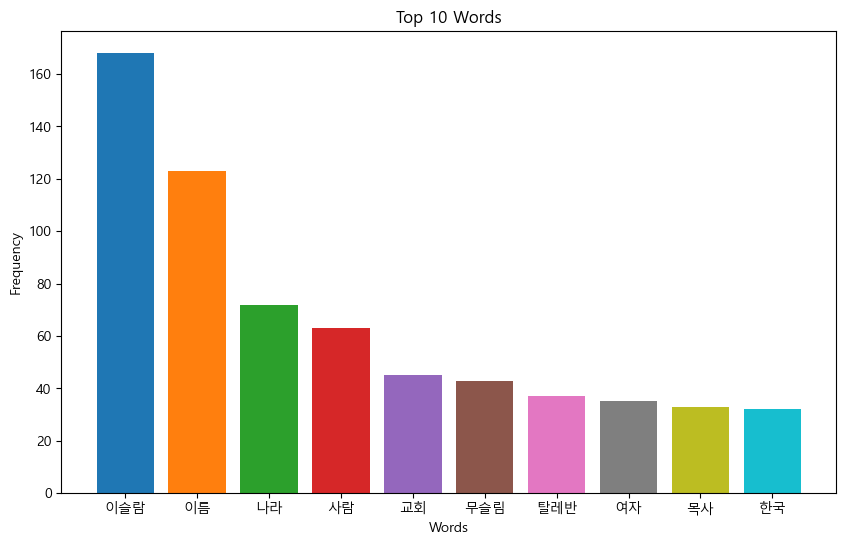

In [8]:
# 시각화 - 그래프
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10, 6))
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
plt.bar(words, counts, color=colors)

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words')
plt.savefig('my_bar.png', format='png')
plt.show()

In [11]:
# 워드 클라우드 생성
wordcloud = WordCloud(font_path='BMDOHYEON_ttf.ttf',
                      width=800, height=400,
                      background_color='white').generate_from_frequencies(word_counts)

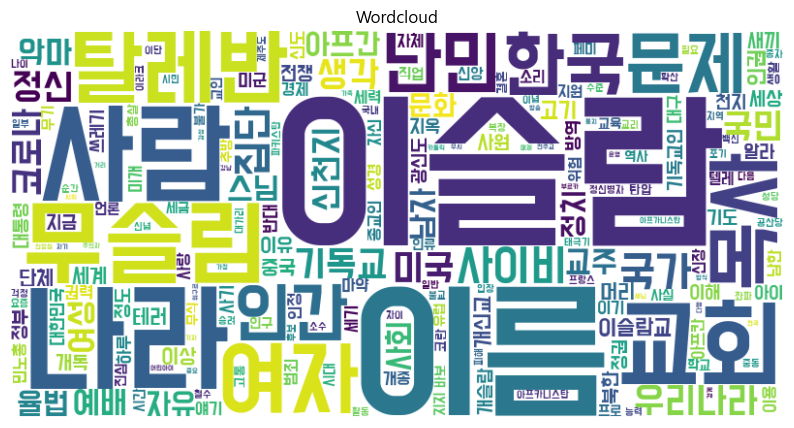

In [12]:
# 시각화 - 워드 클라우드
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud')
plt.savefig('my_wordcloud.png', format='png')
plt.show()